In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# The Fibonacci Numbers

The [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) $F_n$ are defined by induction for all $n\in\mathbb{N}$:
  - $F_0 := 0$,
  - $F_1 := 1$, 
  - $F_{n+2} = F_{n+1} + F_n$ for all $n \in \mathbb{N}$.

Given a natural number `n`, the function `fibonacci(n)` computes the number $F_n$.

In [2]:
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

In [3]:
[ (n,fibonacci(n)) for n in range(19) ]

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 5),
 (6, 8),
 (7, 13),
 (8, 21),
 (9, 34),
 (10, 55),
 (11, 89),
 (12, 144),
 (13, 233),
 (14, 377),
 (15, 610),
 (16, 987),
 (17, 1597),
 (18, 2584)]

It seems that the *Fibonacci numbers* grow pretty fast. Let us plot these numbers to get a better understanding of their growth.

In [4]:
import matplotlib.pyplot as plt
import seaborn           as sns

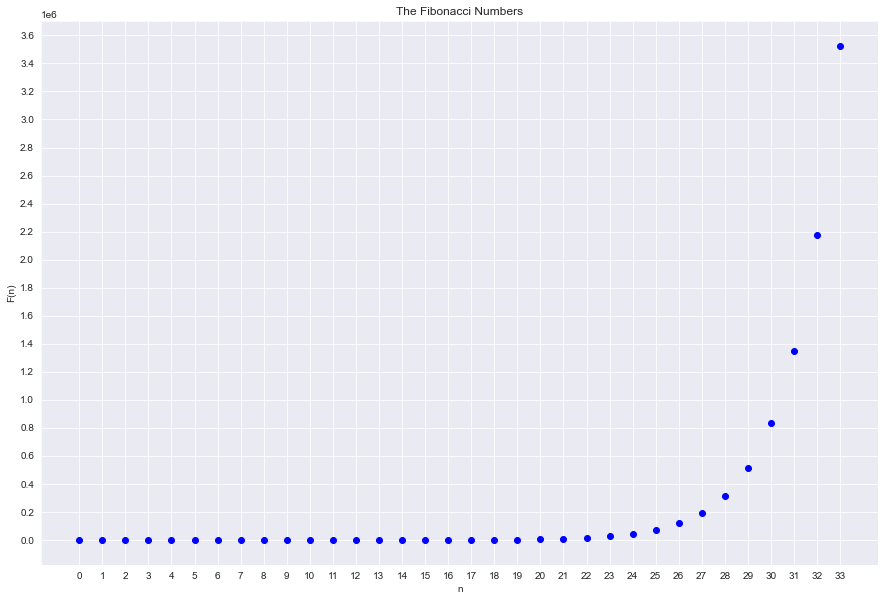

In [5]:
m = 34
X = []
Y = []
for n in range(m):
    X.append(n)
    Y.append(fibonacci(n))
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo')
plt.xticks(X)
plt.yticks([y * 2e5 for y in range(19)])
plt.xlabel('n')
plt.ylabel('F(n)')
plt.title('The Fibonacci Numbers')
plt.show()

It looks like the *Fibonacci numbers* grow exponentially.  Let us confirm this hypothesis by plotting the logarithm of these numbers.

In [6]:
import math

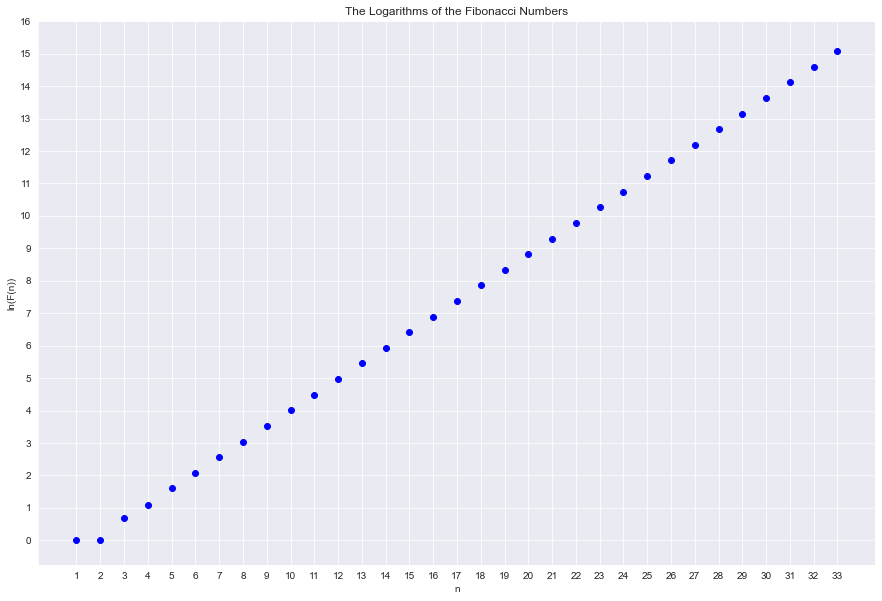

In [7]:
X = X[1:]
Y = Y[1:]
logY = [math.log(y) for y in Y]
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, logY, 'bo') 
plt.xticks(X)
plt.yticks(list(range(17)))
plt.xlabel('n')
plt.ylabel('ln(F(n))')
plt.title('The Logarithms of the Fibonacci Numbers')
plt.show()

This plot looks linear and confirms our hypothesis that these numbers grow exponentially.

Computing the *Fibonacci numbers* took quite long.  Lets measure these times and plot them.

In [8]:
import time

fib(0) = 0
0.0
fib(1) = 1
0.0
fib(2) = 1
0.0
fib(3) = 2
0.0
fib(4) = 3
0.0
fib(5) = 5
0.0
fib(6) = 8
0.0009999275207519531
fib(7) = 13
0.0
fib(8) = 21
0.0
fib(9) = 34
0.0
fib(10) = 55
0.0
fib(11) = 89
0.0
fib(12) = 144
0.0
fib(13) = 233
0.0
fib(14) = 377
0.0
fib(15) = 610
0.001001119613647461
fib(16) = 987
0.0
fib(17) = 1597
0.0009989738464355469
fib(18) = 2584
0.0009996891021728516
fib(19) = 4181
0.002001047134399414
fib(20) = 6765
0.004998922348022461
fib(21) = 10946
0.004000425338745117
fib(22) = 17711
0.007002115249633789
fib(23) = 28657
0.00999760627746582
fib(24) = 46368
0.012999534606933594
fib(25) = 75025
0.01999974250793457
fib(26) = 121393
0.03200054168701172
fib(27) = 196418
0.05100083351135254
fib(28) = 317811
0.08315658569335938
fib(29) = 514229
0.13199949264526367
fib(30) = 832040
0.21300005912780762
fib(31) = 1346269
0.34657907485961914
fib(32) = 2178309
0.5619521141052246
fib(33) = 3524578
0.9004631042480469
fib(34) = 5702887
1.4470837116241455
fib(35) = 9227465
2.31886

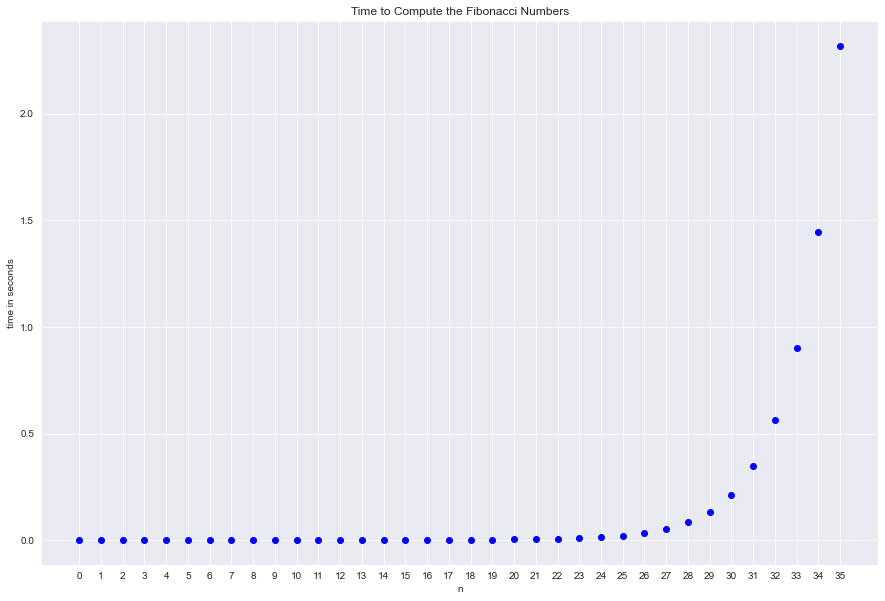

In [9]:
m = 36
Y = []
X = list(range(m))
for n in range(m):
    start = time.time()
    print(f'fib({n}) = {fibonacci(n)}')
    stop  = time.time()
    print(stop - start)
    Y.append(stop - start)
    
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo') 
plt.xticks(X)
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Time to Compute the Fibonacci Numbers')
plt.show()

The times seem to grow exponentially.  

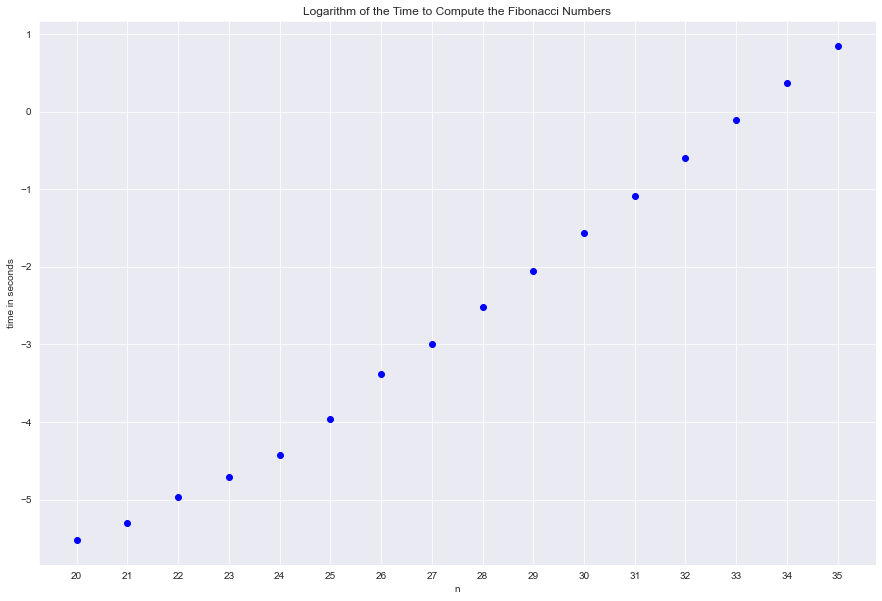

In [10]:
m = 36
Y = []
X = list(range(20, m))
for n in X:
    start = time.time()
    fibonacci(n)
    stop  = time.time()
    Y.append(math.log(stop - start))
    
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo') 
plt.xticks(X)
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Logarithm of the Time to Compute the Fibonacci Numbers')
plt.show()

The logarithmic plot confirms this.  In order to investigate the reason for this exponential growth, we compute the *computation tree*.  This tree shows the recursive invocations of the function.

In [11]:
import graphviz as gv

In [12]:
class ComputationTree:
    def __init__(self, arg, value, left=None, right=None):
        self.mArg   = arg
        self.mValue = value
        self.mLeft  = left
        self.mRight = right

In [13]:
def isLeaf(self):
    return self.mLeft == None and self.mRight == None

ComputationTree.isLeaf = isLeaf
del isLeaf

In [14]:
def toDot(self):
    ComputationTree.sCounter = 0 # static variable of the class ComputationTree
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    NodeDict = {}
    self._assignIDs(NodeDict)
    for n, t in NodeDict.items():
        dot.node(str(n), label='{' + str(t.mArg) + '|' + str(t.mValue) + '}')
        if t.mLeft != None and t.mRight != None:
            dot.edge(str(n), str(t.mLeft .mID))
            dot.edge(str(n), str(t.mRight.mID))
    return dot

ComputationTree.toDot = toDot
del toDot

In [15]:
def _assignIDs(self, NodeDict):
    ComputationTree.sCounter += 1
    self.mID = ComputationTree.sCounter
    NodeDict[self.mID] = self
    if self.isLeaf():
        return
    self.mLeft ._assignIDs(NodeDict)
    self.mRight._assignIDs(NodeDict)
    
ComputationTree._assignIDs = _assignIDs
del _assignIDs

In [16]:
def fibonacci_tree(n):
    if n <= 1:
        return ComputationTree(n, n)
    C1 = fibonacci_tree(n-1)
    C2 = fibonacci_tree(n-2)
    return ComputationTree(n, C1.mValue + C2.mValue, C1, C2)

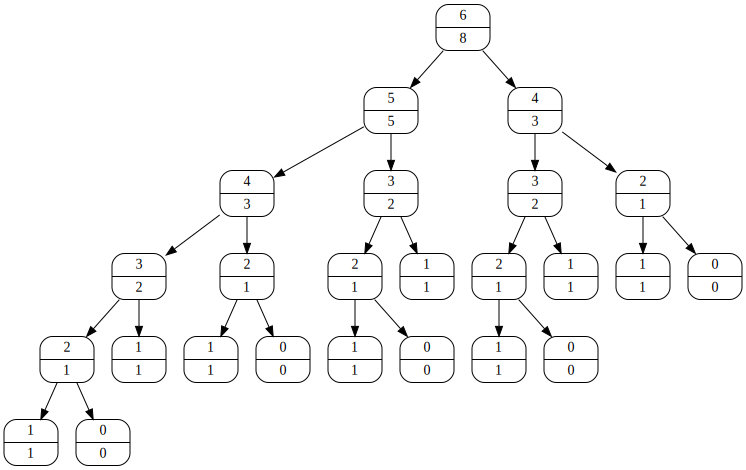

In [17]:
t = fibonacci_tree(6)
t.toDot()

The *computation tree* for the computation of `fibonacci(6)` shows the reason for the inefficiency:
* `fibonacci(5)` is computed once,
* `fibonacci(4)` is computed 2 times,
* `fibonacci(3)` is computed 3 times,
* `fibonacci(2)` is computed 5 times,
* `fibonacci(1)` is computed 8 times, and
* `fibonacci(0)` is computed 5 times.

If we want to compute the Fibonacci numbers efficiently, we must not compute the value `fibonacci(n)` for a given `n` more than once.  The easiest way to achieve this is by storing the Fibnacci numbers in a list `L`.  In the implementation below, `L[n]` stores the $n$-th Fibonacci number.

In [ ]:
def fibonacci_mem(n):
    if n <= 1:
        return n
    L    = [0 for k in range(n+1)]
    L[0] = 0
    L[1] = 1
    for k in range(2, n+1):
        L[k] = L[k-1] + L[k-2]
    return L[n]

Now it is even possible to compute the $100,000^\mbox{th}$ *Fibonnaci number*.

In [ ]:
%%time
x = fibonacci_mem(100000)

In [ ]:
x